# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
pd.__version__

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [13]:
harry_potter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
harry_potter_df.sort_values(by=['year'], ascending=True)

,title,year
223087,Harry Potter and the Sorcerer's Stone,2001
82791,Harry Potter and the Chamber of Secrets,2002
61957,Harry Potter and the Prisoner of Azkaban,2004
187926,Harry Potter and the Goblet of Fire,2005
50581,Harry Potter and the Order of the Phoenix,2007
109213,Harry Potter and the Half-Blood Prince,2009
152831,Harry Potter and the Deathly Hallows: Part 1,2010
143147,Harry Potter and the Deathly Hallows: Part 2,2011


### How many movies were made in the year 2017?

In [14]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [15]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [16]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [17]:
len(movies[movies.title == "Hamlet"])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [18]:
hamlet_df = movies[(movies.title == "Hamlet")&(movies.year >= 2000)]
hamlet_df.sort_values(by=['year'], ascending=True)

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [19]:
# check there's only one movie entitled "Inception"
inception_df = cast[cast.title == "Inception"]
supporting_cast = inception_df["n"].isnull().sum()
print("Number of supporting roles in the movie 'Inception': ", supporting_cast)

Number of supporting roles in the movie 'Inception':  27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [20]:
main_cast = len(inception_df) - supporting_cast
print("Number of main cast in the movie 'Inception': ", main_cast)

Number of main cast in the movie 'Inception':  51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [21]:
inception_df[inception_df.n >= 0].sort_values(by=['n'], ascending = True).iloc[:10]

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [22]:
# (A)
albus_bumbledore_df = cast[cast.character.str.contains('Albus Dumbledore', case = False)]
albus_bumbledore_df.sort_values(by=['year'], ascending=True)

,title,year,name,type,character,n
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792422,Harry Potter and the Half-Blood Prince,2009,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792419,Harry Potter and the Deathly Hallows: Part 1,2010,Michael Gambon,actor,Professor Albus Dumbledore,39.0
1893421,Harry Potter and the Deathly Hallows: Part 1,2010,Toby Regbo,actor,Young Albus Dumbledore,NaN
792420,Harry Potter and the Deathly Hallows: Part 2,2011,Michael Gambon,actor,Professor Albus Dumbledore,2.0


In [23]:
# (B)
ab_actors = albus_bumbledore_df.name.unique()
print(ab_actors)

['Dane Farwell' 'Michael Gambon' 'Richard Harris' "George (X) O'Connor"
 'Toby Regbo' 'Timothy Tedmanson']


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [24]:
# (A)
keanu_reeves_df = cast[cast.name.str.contains('Keanu Reeves', case = False)]
print("Number of roles Keanu Reeves has played in his career: ", len(keanu_reeves_df))

Number of roles Keanu Reeves has played in his career:  62


In [25]:
# (B)
keanu_reeves_df[(keanu_reeves_df.n >=0) & (keanu_reeves_df.year >= 1999)].sort_values(by = ["year"], ascending =True)

,title,year,name,type,character,n
1892370,Me and Will,1999,Keanu Reeves,actor,Himself,42.0
1892369,Me and Will,1999,Keanu Reeves,actor,Dogstar,42.0
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892398,The Watcher,2000,Keanu Reeves,actor,Griffin,3.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892387,The Gift,2000,Keanu Reeves,actor,Donnie Barksdale,3.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892379,Something's Gotta Give,2003,Keanu Reeves,actor,Julian Mercer,3.0
1892391,The Matrix Reloaded,2003,Keanu Reeves,actor,Neo,59.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [26]:
# (A)
cast[(cast.n >=0) & (cast.year >= 1950) & (cast.year <= 1960)].sort_values(by = ["year"], ascending=True)

,title,year,name,type,character,n
3786094,Akdeniz korsanlari,1950,Muazzez ?lkerer,actress,Maria,2.0
3204512,The Petty Girl,1950,Audrey Long,actress,Mrs. Connie Manton Dezlow,5.0
3204513,Trial Without Jury,1950,Audrey Long,actress,Myra Peters,4.0
945703,What the Butler Saw,1950,Alfred Harris,actor,Bishop,12.0
945645,Holiday Rhythm,1950,Alan Harris,actor,Mr. Superdyne,5.0
...,...,...,...,...,...,...
3444751,Das Glas Wasser,1960,Liselotte Pulver,actress,Queen Anne,2.0
536492,Song Without End,1960,Alexander Davion,actor,Frederic Chopin,14.0
2523124,L'enclos,1960,Stevo Zigon,actor,Dragulavic,6.0
2522609,Robinson et le triporteur,1960,Don Ziegler,actor,Popeline's Father,10.0


In [27]:
# (B)
cast[(cast.n >=0) & (cast.year >= 2007) & (cast.year <= 2017)].sort_values(by = ["year"], ascending=True)

,title,year,name,type,character,n
3129021,Hor taew tak,2007,Sukonthawa Koetnimit,actress,Khaao Tuu,2.0
2308651,Bahay kubo: A pinoy mano po!,2007,Reinel Tulabing,actor,JR's Sibling,51.0
2720636,Choi-gang lo-maen-seu,2007,Yoon-seo Chae,actress,Hye-ryeon,73.0
2308669,Traffic Signal,2007,Vicky Tulaskar,actor,Afzal,6.0
1835112,The Third Nail,2007,Cody Premus,actor,Hannah's Son #1,31.0
...,...,...,...,...,...,...
3546392,"Mommy, I Didn't Do It",2017,Paige Searcy,actress,Julie Plainview,2.0
3546397,Sickness,2017,Janet Searfoss,actress,Gretchen,68.0
891598,I'm Not a Terrorist,2017,Gulshan Grover,actor,Abu Zar,1.0
2199547,Land of Smiles,2017,Bradley Stryker,actor,Dale,4.0


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [28]:
# (A) Considered leading roles when n=1.
cast[(cast.n ==1) & (cast.year >= 2000)].sort_values(by = ["year"], ascending=True)

,title,year,name,type,character,n
2580878,Himawari,2000,Kumiko As?,actress,Tomomi Manabe,1.0
1552751,Solid Cover,2000,Shane Minor,actor,Shane,1.0
3179909,In Flagrante,2000,Kyle Lein,actress,Sissy Dalrymple,1.0
773927,Faust: Love of the Damned,2000,Mark (II) Frost,actor,Faust,1.0
3554003,A Sense of Entitlement,2000,Nicole Severine,actress,Jessica Blaine,1.0
...,...,...,...,...,...,...
1481627,Greenback$,2019,Taylor McCluskey,actor,Jack Murphy,1.0
594546,Infinite Payback,2020,Aaron Dill,actor,Random Guy,1.0
594544,Infinite Payback,2020,Aaron Dill,actor,Dark,1.0
2135010,Astronomy Walkers,2020,Aaron Smolinski,actor,Anthony Speranza,1.0


In [29]:
# (B) Considered non-leading roles when n>1
cast[(cast.n > 1) & (cast.year >= 2000)].sort_values(by = ["year"], ascending=True)

,title,year,name,type,character,n
2043729,Here on Earth,2000,Garth Schumacher,actor,Pastor,19.0
1915318,Blood,2000,Phil Richford,actor,Rick,14.0
1975320,Picking Up the Pieces,2000,Raul Rubio,actor,Sordo's Band: Guitar & Vocals,44.0
3175476,The 6th Day,2000,Mi-Jung Lee,actress,Newscaster,37.0
3414910,Certain Guys,2000,Jill Peters,actress,Watiress,19.0
...,...,...,...,...,...,...
1958272,Blink of an Eye,2019,Mike Root,actor,Det. Adam Willis,2.0
3720921,Astronomy Walkers,2020,Alyssa (II) Ward,actress,Melissa,9.0
773457,Astronomy Walkers,2020,Troy Fromin,actor,Francis,5.0
616796,Astronomy Walkers,2020,Shawn Doucette,actor,Clarence,6.0


In [30]:
# (C)
cast[(cast.n.isnull()) & (cast.year >= 2000)].sort_values(by = ["year"], ascending=True)

,title,year,name,type,character,n
2861659,101 Ways (The Things a Girl Will Do to Keep He...,2000,Patricia Elliott,actress,Ruth,NaN
1406561,Shikaar,2000,Ananth Narayan Mahadevan,actor,Sree Nath,NaN
2652139,Keep Breathing,2000,Kristen Boney,actress,Hillary,NaN
2792058,La chambre obscure,2000,Capucine Daumas,actress,"Ali?nor, as a child",NaN
2944751,In extremis,2000,Carine Giron,actress,Femme soir?e de la cave,NaN
...,...,...,...,...,...,...
3727429,Avatar 5,2025,Sigourney Weaver,actress,Grace Augustine,NaN
1278857,Avatar 5,2025,Stephen Lang,actor,Miles Quaritch,NaN
1415428,100 Years,2115,John Malkovich,actor,Hero,NaN
2516044,100 Years,2115,Marko Zaror,actor,Bad Guy,NaN


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [31]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<Axes: >

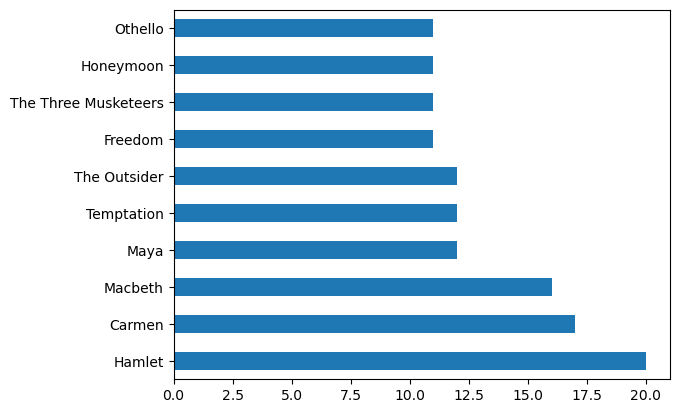

In [32]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [151]:
movies_2000s = movies[(movies['year'] >= 2000)&(movies['year'] <= 2009)]
movies_per_year = movies_2000s['year'].value_counts()
top_3_years = movies_per_year.head(3)
print(top_3_years)

2009    6125
2008    5151
2007    4467
Name: year, dtype: int64


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

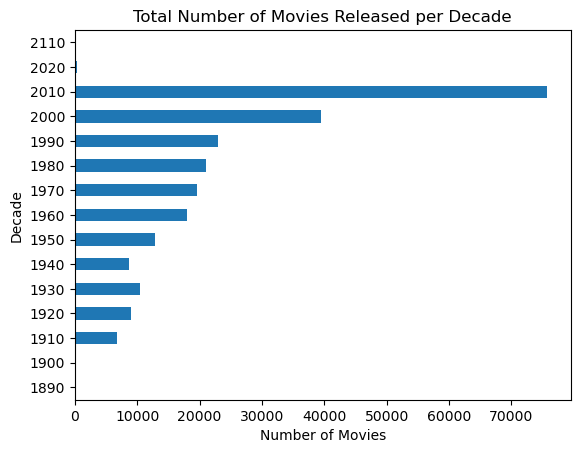

In [35]:
# Calculate the decade for each movie
movies['decade'] = (movies['year'] // 10) * 10

# Count the number of movies per decade
movies_per_decade = movies['decade'].value_counts().sort_index()

# Plot the histogram
movies_per_decade.plot(kind='barh')
plt.xlabel('Number of Movies')
plt.ylabel('Decade')
plt.title('Total Number of Movies Released per Decade')
plt.show()


### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [42]:
# (A)
common_characters = cast.character.value_counts().head(10)
common_characters

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [50]:
# (B)
char_herself = cast[cast.character == "Herself"]
top_10_herself = char_herself.name.value_counts().head(10)
top_10_herself

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: name, dtype: int64

In [51]:
# (C)
char_himself = cast[cast.character == "Himself"]
top_10_himself = char_himself.name.value_counts().head(10)
top_10_himself

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [69]:
# (A)
zombie_roles = cast[cast['character'].str.startswith("Zombie")]
top_10_zombie_roles = zombie_roles['character'].value_counts().head(10)
top_10_zombie_roles

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [70]:
# (B)
police_roles = cast[cast['character'].str.startswith("Police")]
top_10_police_roles = police_roles['character'].value_counts().head(10)
top_10_police_roles

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

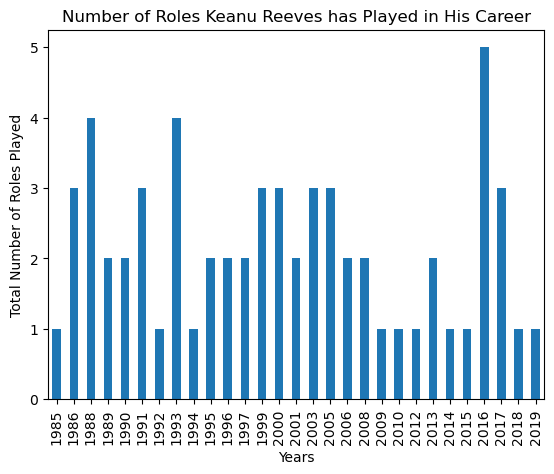

In [81]:
keanu_reeves_df = cast[cast.name.str.contains('Keanu Reeves', case = False)]
keanu_reeves_per_year = keanu_reeves_df.year.value_counts().sort_index()

# Plot the histogram
keanu_reeves_per_year.plot(kind='bar')
plt.xlabel('Years')
plt.ylabel('Total Number of Roles Played')
plt.title('Number of Roles Keanu Reeves has Played in His Career')
plt.show()


### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


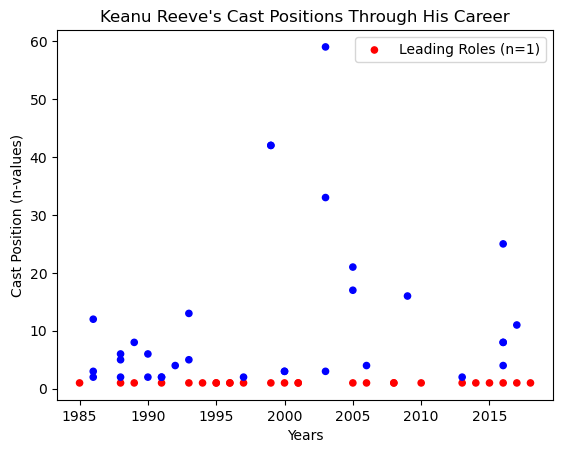

In [100]:
keanu_reeves_df = cast[cast.name.str.contains('Keanu Reeves', case = False)]

# Plot the scatterplot
cmap = { 1.0 : 'red'}
keanu_reeves_df.plot(x= 'year', y= 'n', kind='scatter', c=[cmap.get(d, 'blue') for d in keanu_reeves_df.n], label="Leading Roles (n=1)")
plt.xlabel('Years')
plt.ylabel('Cast Position (n-values)')
plt.title("Keanu Reeve's Cast Positions Through His Career")
plt.show()


### Section II - Q7: Plot the number of "Hamlet" films made by each decade

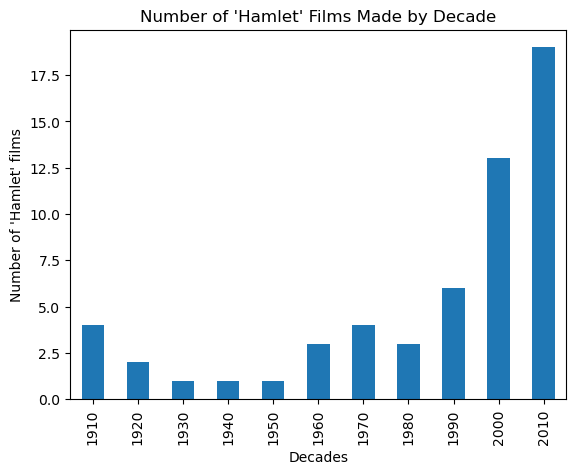

In [105]:
hamlet_movies = movies[movies.title.str.contains("Hamlet", case = False)]
hamlet_per_decade = hamlet_movies['decade'].value_counts().sort_index()

# Plot the histogram
hamlet_per_decade.plot(kind='bar')
plt.xlabel('Decades')
plt.ylabel("Number of 'Hamlet' Films")
plt.title("Number of 'Hamlet' Films Made by Decade")
plt.show()


### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [109]:
leading_roles_60s_df = cast[(cast.n == 1.0)&(cast.year >=1960)&(cast.year<=1969)]
print("Number of leading roles available in the 1960s: ", len(leading_roles_60s_df))

Number of leading roles available in the 1960s:  11823


In [108]:
leading_roles_00s_df = cast[(cast.n == 1.0)&(cast.year >=2000)&(cast.year<=2009)]
print("Number of leading roles available in the 2000s: ", len(leading_roles_00s_df))

Number of leading roles available in the 2000s:  26344


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [122]:
frank_oz_df = cast[cast.name.str.contains("Frank Oz", case=False)]

# Count the number of roles for each film
film_roles_count = frank_oz_df.groupby(['title', 'year']).size()

# Filter films where Frank Oz played more than 1 role
films_with_multiple_roles = film_roles_count[film_roles_count > 1]

print(films_with_multiple_roles.sort_index(level='year'))

title                                 year
The Muppet Movie                      1979    8
An American Werewolf in London        1981    2
The Great Muppet Caper                1981    6
The Dark Crystal                      1982    2
The Muppets Take Manhattan            1984    7
Follow That Bird                      1985    3
The Muppet Christmas Carol            1992    7
Muppet Treasure Island                1996    4
Muppets from Space                    1999    4
The Adventures of Elmo in Grouchland  1999    3
dtype: int64


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [123]:
# Count the number of characters portrayed
characters_count = frank_oz_df.groupby(['character', 'year']).size()

# Filter characters where Frank Oz played more than 1 role
repeated_characters = characters_count[characters_count > 1]

print(repeated_characters.sort_index(level='year'))

character   year
Miss Piggy  1981    2
dtype: int64


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<Axes: >

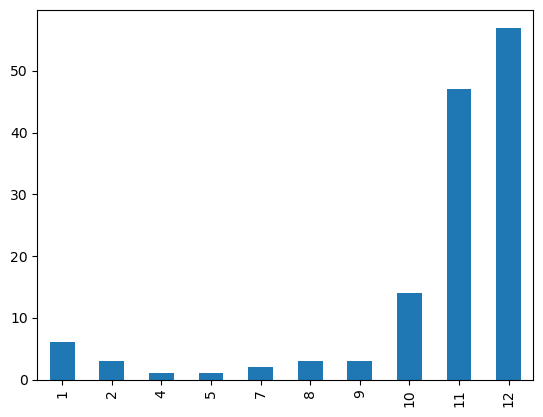

In [124]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<Axes: >

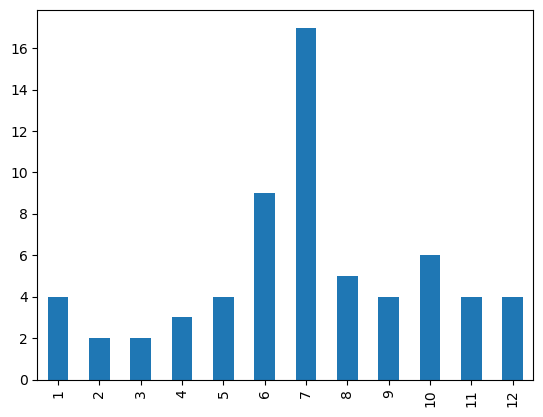

In [128]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<Axes: >

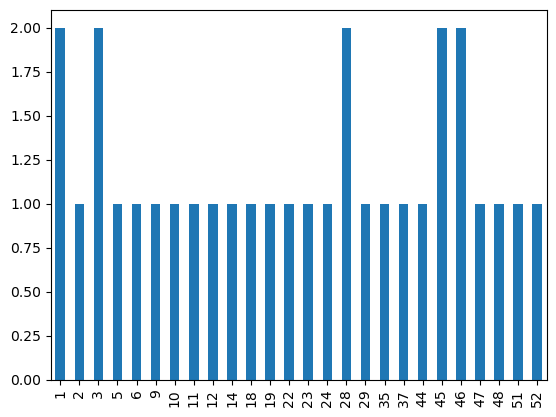

In [129]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [146]:
keanu_movies = cast[(cast.name.str.contains('Keanu Reeves')) & (cast.n == 1)]
keanu_usa = release_dates[(release_dates.country == 'USA')]
keanu_merge_m_usa = pd.merge(keanu_movies, keanu_usa, on="title", how="inner")

# Sort the merged DataFrame by the date of release
sorted_movies = keanu_merge_m_usa.sort_values('date')

# Print the title and release date for each movie
print(sorted_movies[['title', 'date']])

                               title       date
14                             Speed 1922-10-22
15                             Speed 1936-05-08
18                    Sweet November 1968-02-08
24                  The Night Before 1988-04-15
3   Bill & Ted's Excellent Adventure 1989-02-17
2         Bill & Ted's Bogus Journey 1991-07-19
13                     Little Buddha 1994-05-25
16                             Speed 1994-06-10
10                   Johnny Mnemonic 1995-05-26
1               A Walk in the Clouds 1995-08-11
4                     Chain Reaction 1996-08-02
6                  Feeling Minnesota 1996-09-13
21              The Devil's Advocate 1997-10-17
23                        The Matrix 1999-03-31
25                  The Replacements 2000-08-11
19                    Sweet November 2001-02-16
7                          Hard Ball 2001-09-14
5                        Constantine 2005-02-18
22                    The Lake House 2006-06-16
17                      Street Kings 200

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<Axes: >

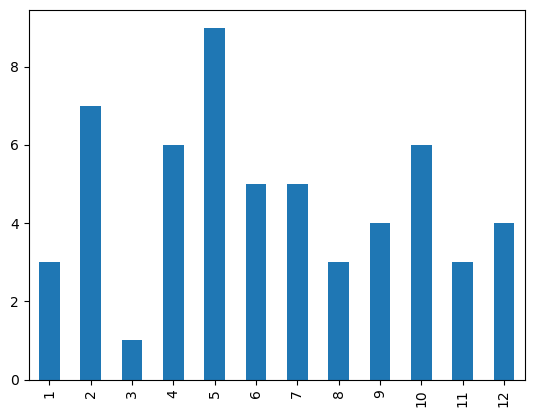

In [149]:
# Filter Movies with Keanu Reeves(including non-leading roles) and released in the USA
keanu_reeves = cast[cast.name.str.contains('Keanu Reeves')]
keanu_usa = release_dates[(release_dates.country == 'USA')]

# Merge DataFrames with movies with Keanu Reeves including non-leading roles in the USA
keanu_merge_usa = pd.merge(keanu_reeves, keanu_usa, on="title", how="inner")

# Bar Plot by Month
keanu_merge_usa.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<Axes: >

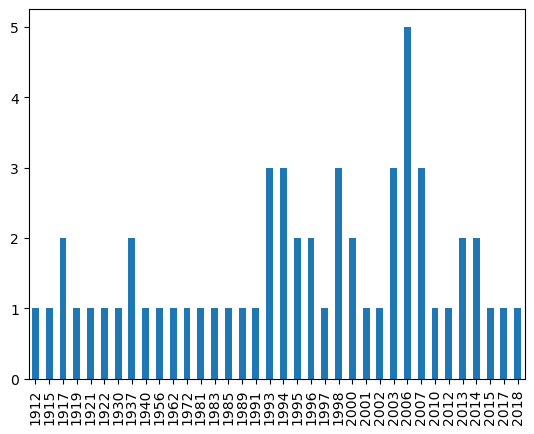

In [150]:
# Filter Movies with Ian McKellen (including non-leading roles) and released in the USA
ian_mckellen = cast[cast.name.str.contains('Ian McKellen', case=False)]
ian_usa = release_dates[(release_dates.country == 'USA')]

# Merge DataFrames with movies with Ian McKellen including non-leading roles in the USA
ian_merge_usa = pd.merge(ian_mckellen, ian_usa, on="title", how="inner")

# Bar Plot by Years
ian_merge_usa.date.dt.year.value_counts().sort_index().plot(kind='bar')